# 卒業研究4：データセットの作成とロジスティック回帰

元データをそのまま
#### 坂西和也

# データの読み込み


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data_path = '/home/mori/banzai/banzai_study/masuda/'
data = pd.read_csv(data_path + 'EuF3_data.csv' , sep='\t')

In [62]:
# データの確認
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


# データの可視化
読み込んだデータは各実験状態における理論値（期待値）

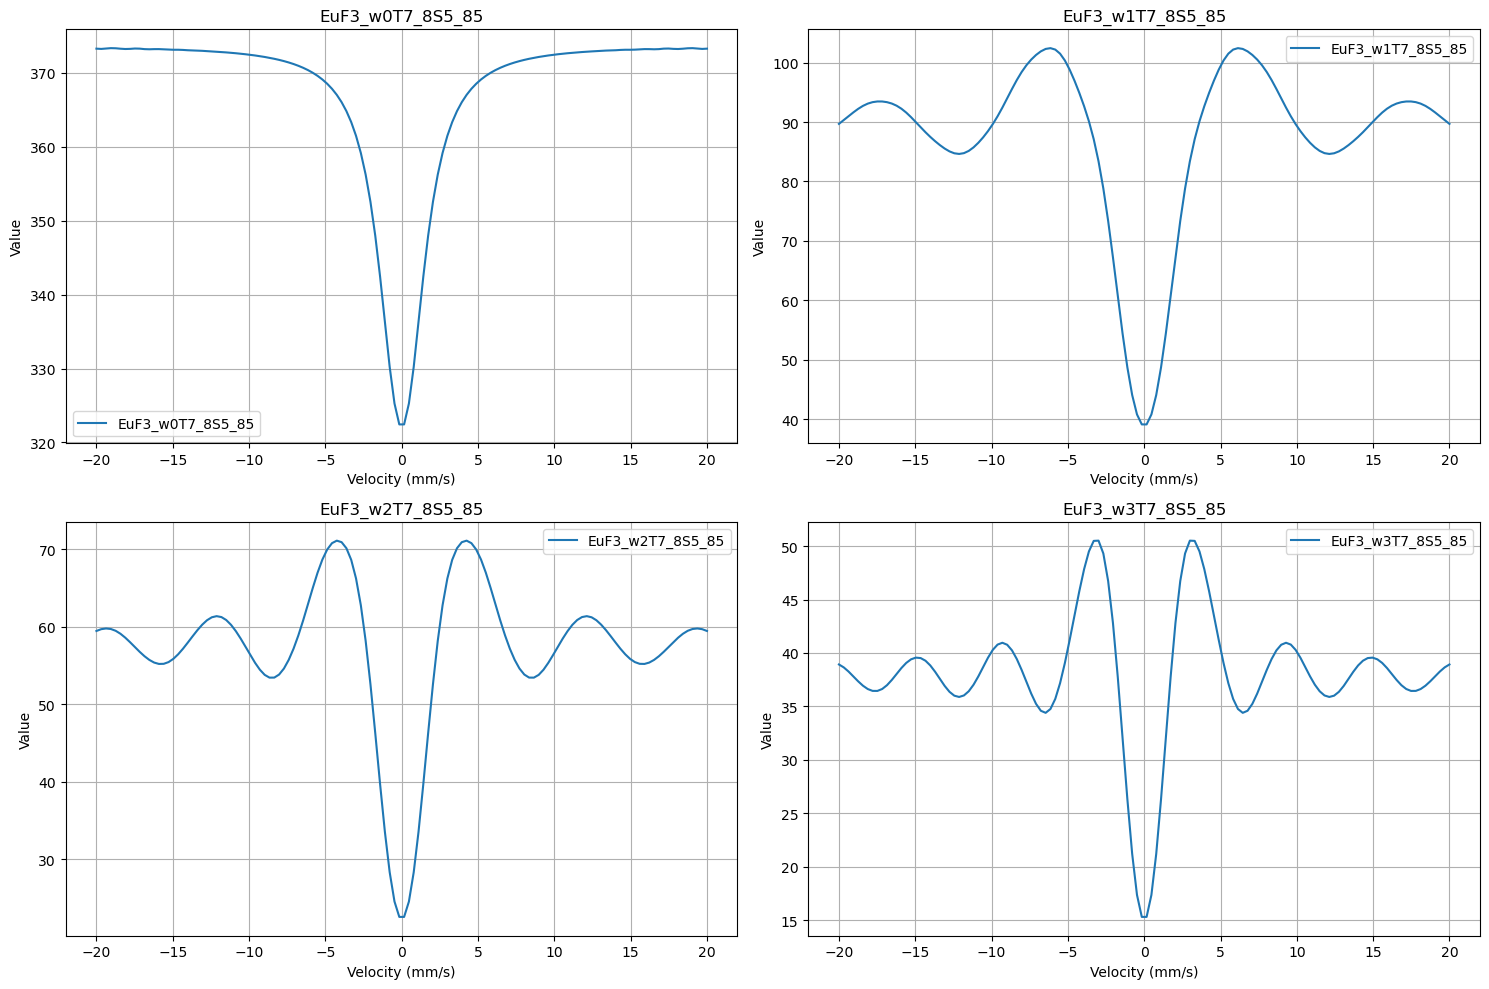

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# データにノイズ付加
ノイズには正規乱数で平均が0，分散が真のデータのy軸値をそれぞれ与えている．

In [64]:
import pandas as pd
import numpy as np

# 0行目のデータを取得
row_at_zero_index = data.iloc[0]

# データをコピーして新しいデータフレームを作成
data_noisy = data.copy()

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 各カラムのデータに正規乱数のノイズを追加
for column in columns_to_plot:
    np.random.seed(0)
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    data_noisy[column] = data[column] + noise

In [65]:
row_at_zero_index

Velocity (mm/s)     -20.000000
EuF3_w0T7_8S5_85    373.275017
EuF3_w1T7_8S5_85     89.683715
EuF3_w2T7_8S5_85     59.446287
EuF3_w3T7_8S5_85     38.924525
Name: 0, dtype: float64

In [66]:
columns_to_plot

['EuF3_w0T7_8S5_85',
 'EuF3_w1T7_8S5_85',
 'EuF3_w2T7_8S5_85',
 'EuF3_w3T7_8S5_85']

In [67]:
len(data)

128

# 付加したデータの可視化

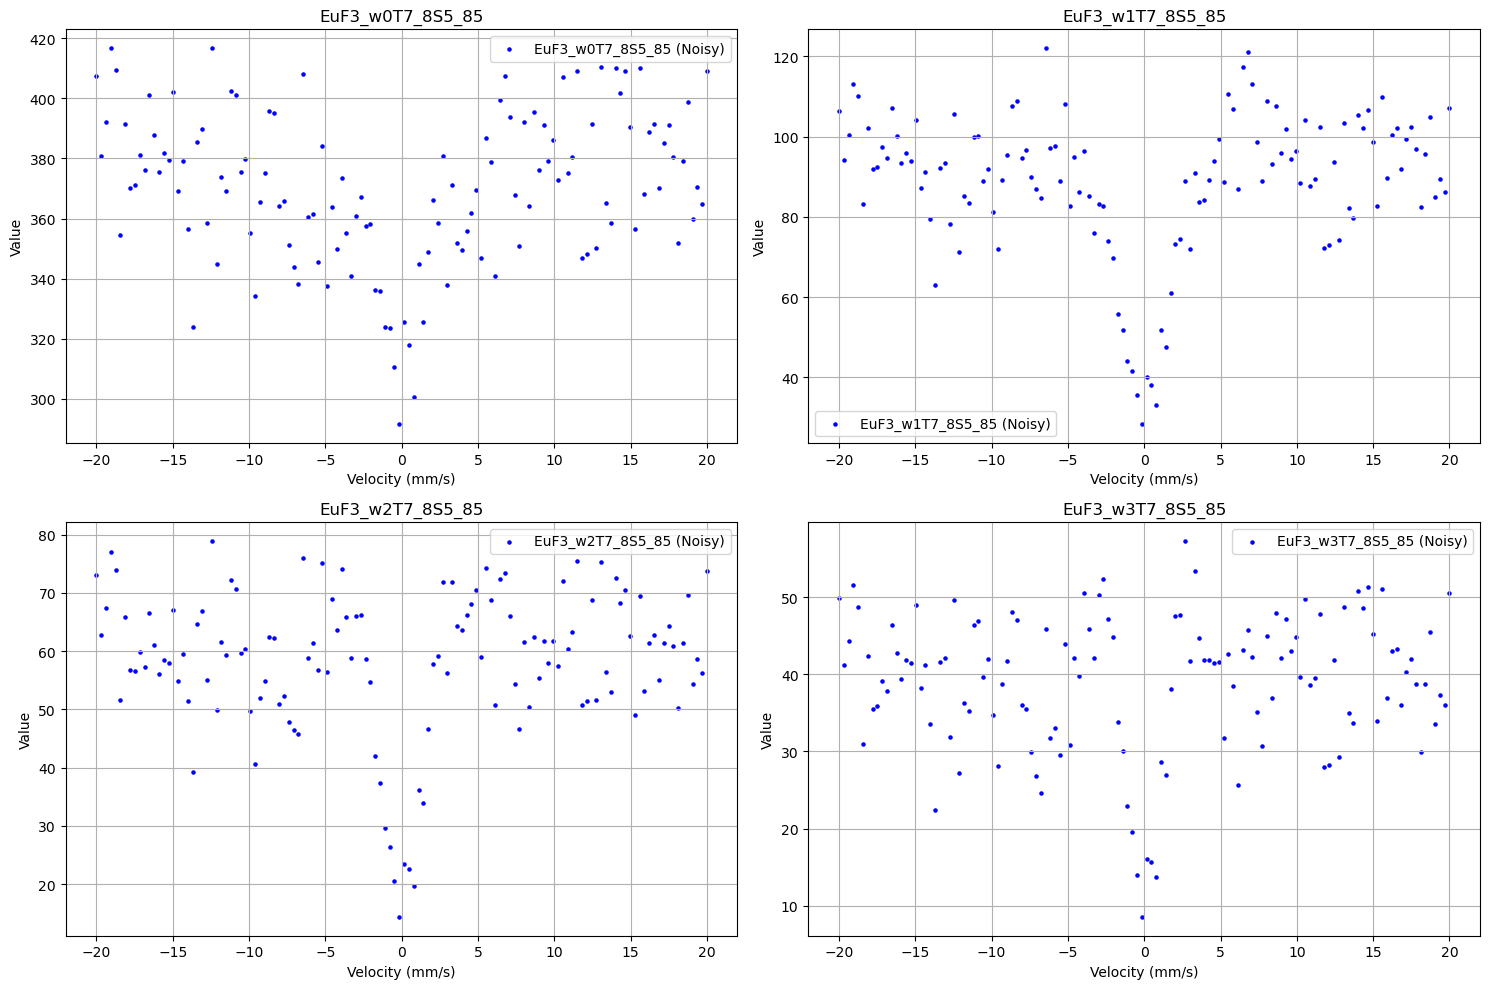

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# 2x2の配置で散布図をプロット
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.scatter(x, data_noisy[column], label=column + ' (Noisy)', color='blue', s=5)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# ランダムなデータの作成
いくら実験をしてもピークが現れないデータを作成する．

正規乱数を用いて平均と分散は速度が-20におけるy軸値を与えている．

それぞれ独立で生成している．

In [69]:
# 新しいデータフレームを作成
data_random_noise = pd.DataFrame()
data_random_noise['Velocity (mm/s)'] = data['Velocity (mm/s)']

np.random.seed(00)

# 2列目から5列目までのカラムにランダムなノイズを追加
for column in columns_to_plot:
    mean = row_at_zero_index[column]
    variance = row_at_zero_index[column]
    noise = np.random.normal(mean, np.sqrt(variance), size=data[column].shape)
    data_random_noise[column] = noise


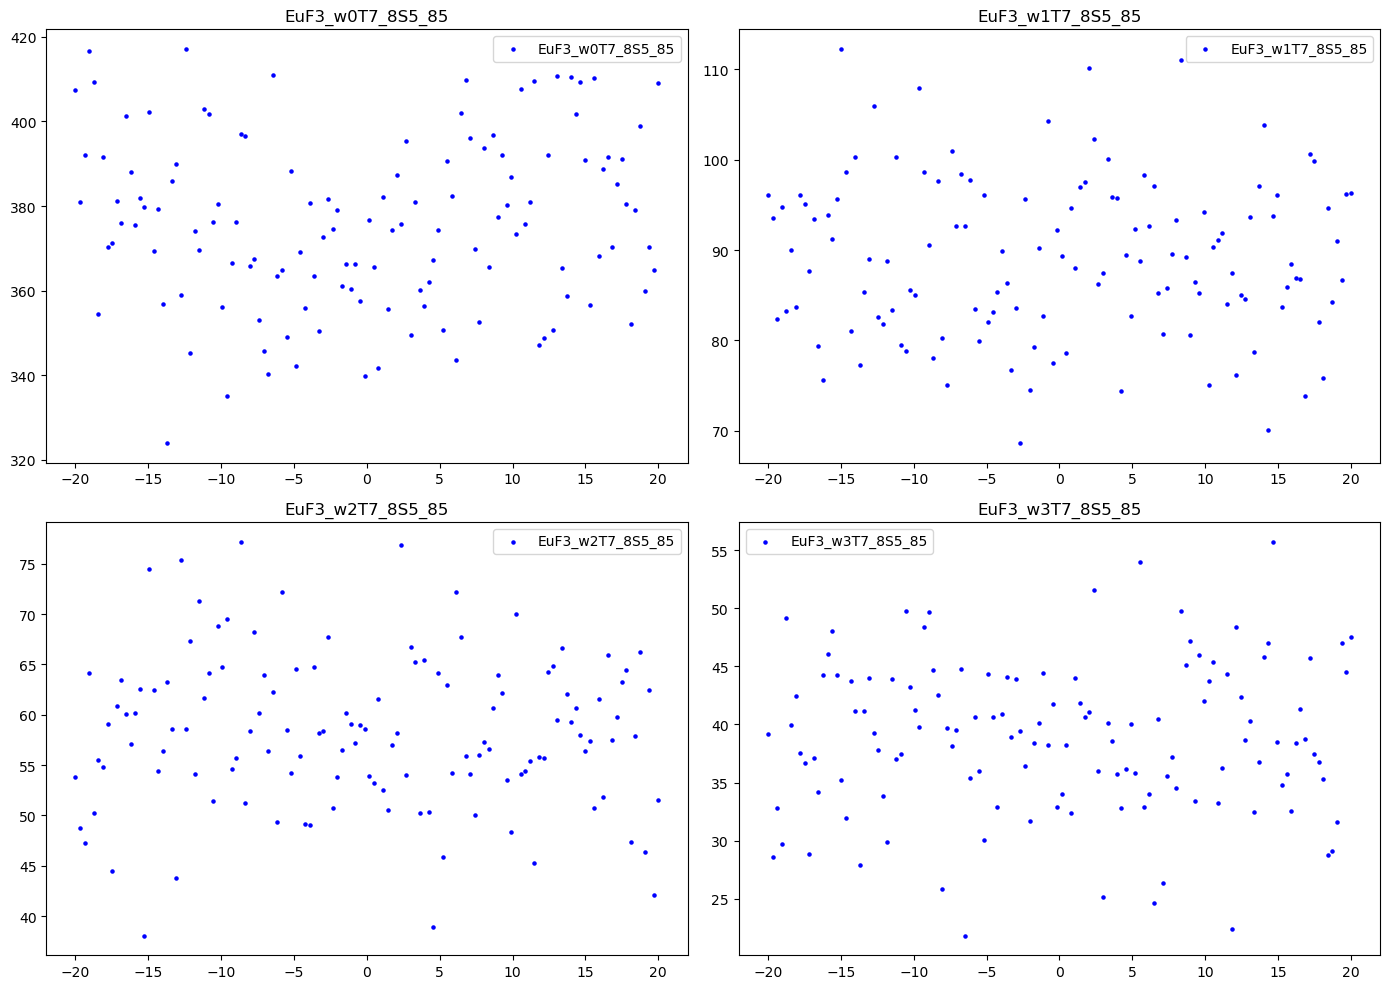

In [70]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(14, 10))

for idx, column in enumerate(data_random_noise.columns[1:]):
    plt.subplot(2, 2, idx+1)
    plt.scatter(data_random_noise['Velocity (mm/s)'], data_random_noise[column], label=column, color='blue', s=5)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

# 2つのデータの比較
ヒストグラムを用いたデータの比較を行う

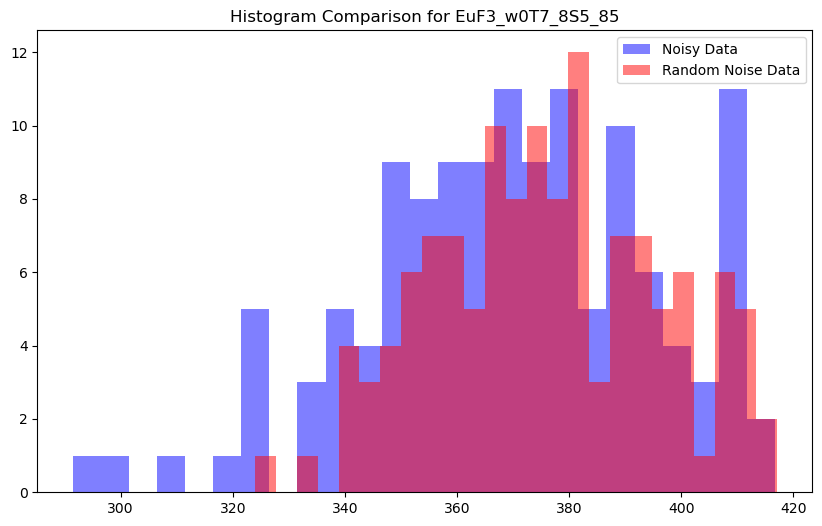

In [71]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(10, 6))

# data_noisyの2列目のデータをヒストグラムでプロット
plt.hist(data_noisy[columns_to_plot[0]], bins=25, alpha=0.5, label='Noisy Data', color='blue')

# data_random_noiseの2列目のデータをヒストグラムでプロット
plt.hist(data_random_noise[columns_to_plot[0]], bins=25, alpha=0.5, label='Random Noise Data', color='red')

plt.title(f'Histogram Comparison for {columns_to_plot[0]}')
plt.legend()
plt.show()

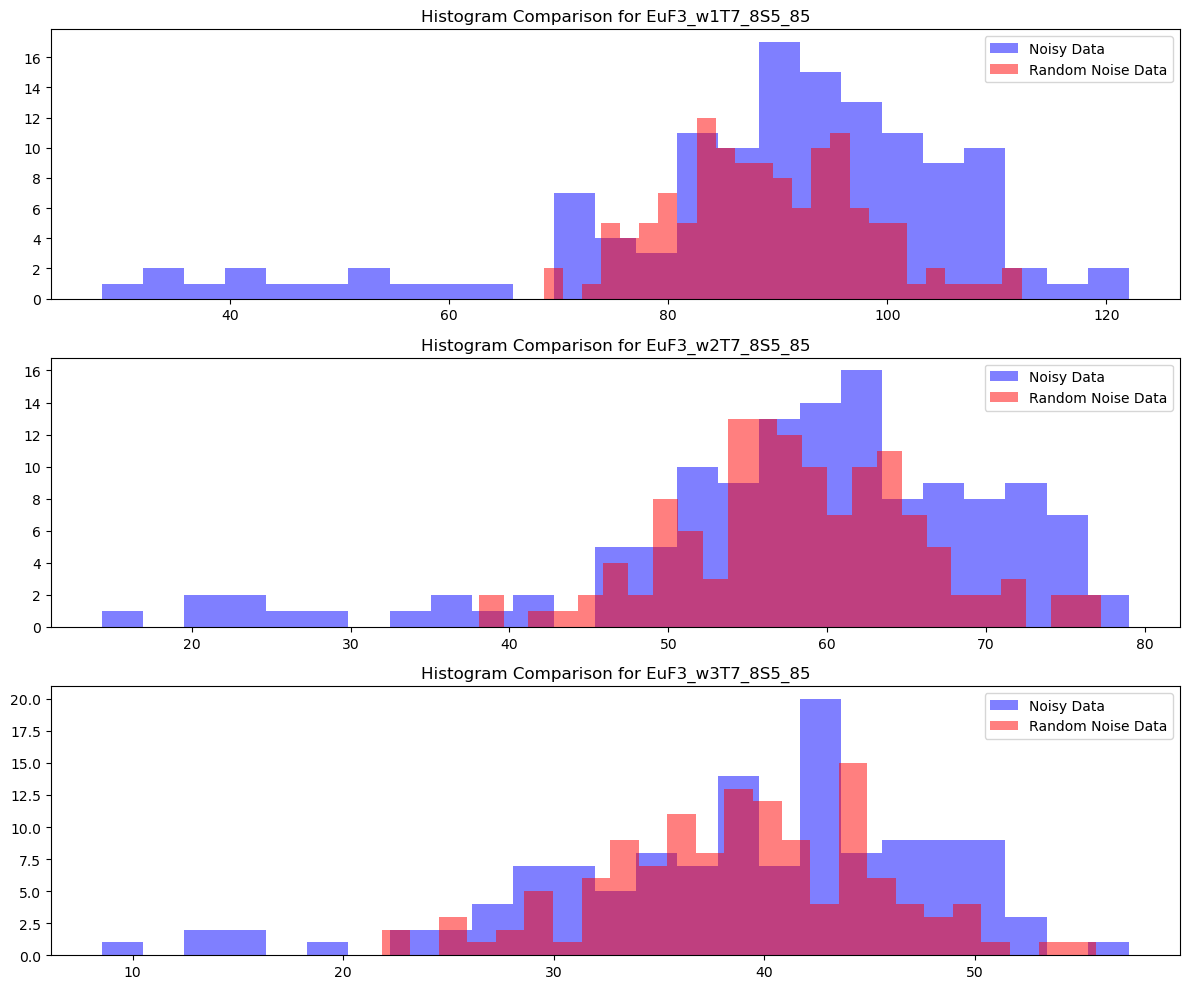

In [72]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(12, 10))

for idx, column in enumerate(columns_to_plot[1:4], start=1):
    plt.subplot(3, 1, idx)
    
    # data_noisyのデータをヒストグラムでプロット
    plt.hist(data_noisy[column], bins=25, alpha=0.5, label='Noisy Data', color='blue')
    
    # data_random_noiseのデータをヒストグラムでプロット
    plt.hist(data_random_noise[column], bins=25, alpha=0.5, label='Random Noise Data', color='red')
    
    plt.title(f'Histogram Comparison for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

元データにノイズを乗せたものは裾が長い

# データセットの作成
ロジスティック回帰を行うためにデータセットを作成する．

元データに乱数を乗せたものと単なる乱数を並べたものをそれぞれ20個作りDataFrameにまとめる．

In [73]:
# 空のデータフレームを作成
dataset = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w0T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset[column_name] = data['EuF3_w0T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w0T7_8S5_85'], np.sqrt(row_at_zero_index['EuF3_w0T7_8S5_85']), size=data['EuF3_w0T7_8S5_85'].shape)
    dataset[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [74]:
# 確認
dataset.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,407.357084,404.657900,365.223119,407.831903,374.251885,381.799676,367.251254,405.936525,375.037122,...,361.536997,368.044766,382.871696,378.248067,358.772895,373.784586,384.575009,356.891197,354.077735,353.120843
1,-19.685039,380.970502,361.420926,372.152658,381.672814,382.898466,366.847483,387.323628,364.238064,394.322642,...,370.838020,375.300715,370.603705,355.722859,398.707470,378.304517,397.062120,398.505554,352.729766,357.415817
2,-19.370079,392.197394,363.082918,332.014841,375.151934,354.045931,420.251621,377.495979,373.921647,335.670807,...,360.048198,378.115296,385.788571,365.962213,397.350849,365.640676,389.154398,391.131016,360.947182,386.125852
3,-19.055118,416.642868,352.612053,405.037574,337.337457,386.745864,368.473122,355.971721,381.218151,346.556872,...,391.218089,355.399851,402.700451,362.940273,342.267521,369.327857,357.833664,385.647982,393.785257,408.488763
4,-18.740157,409.411151,390.047935,338.674652,367.967215,365.244535,375.444662,325.278070,358.083509,328.954772,...,337.640587,384.232417,368.751097,389.853274,344.910001,348.706659,381.236020,352.897154,370.233917,345.423155


In [75]:
# 教師信号
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

確認と比較のための適当なものをそれぞれ1つずつ選んで可視化する．

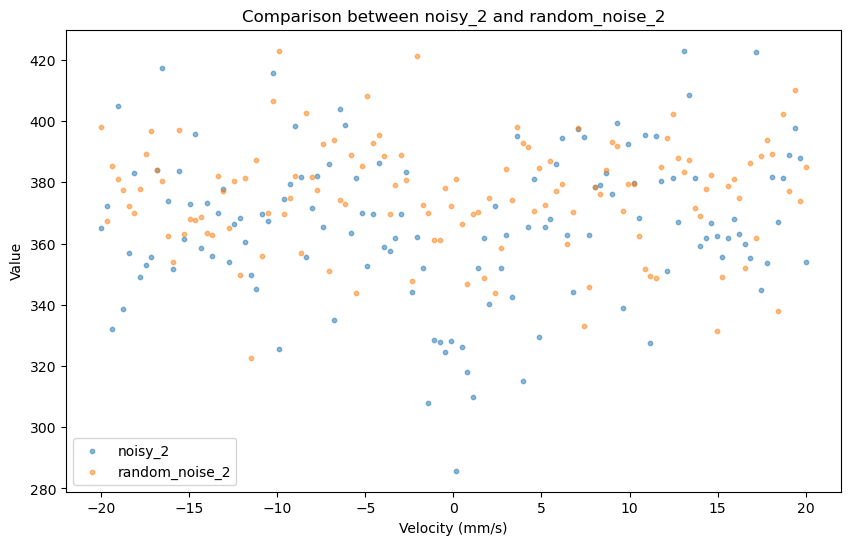

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

以下のように少し迷うものもある．

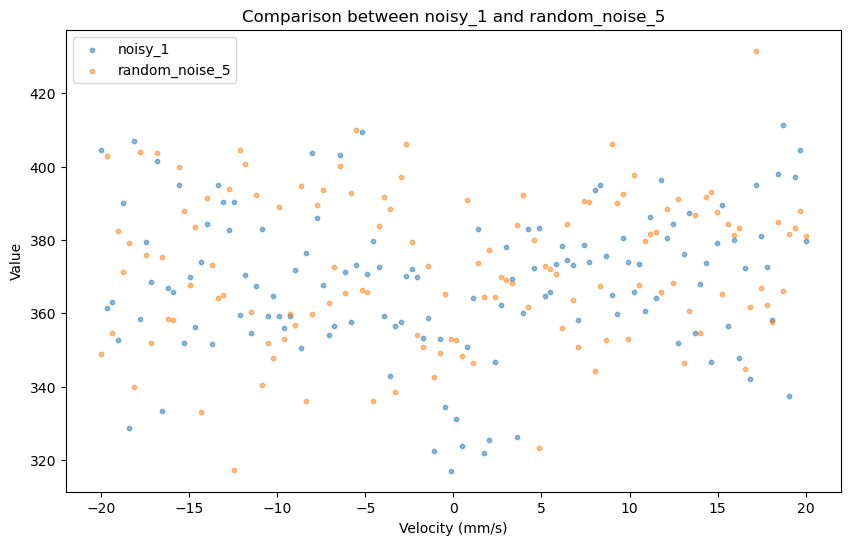

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_1"], label="noisy_1", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_5"], label="random_noise_5", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_1 and random_noise_5")
plt.show()

# ロジスティック回帰

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



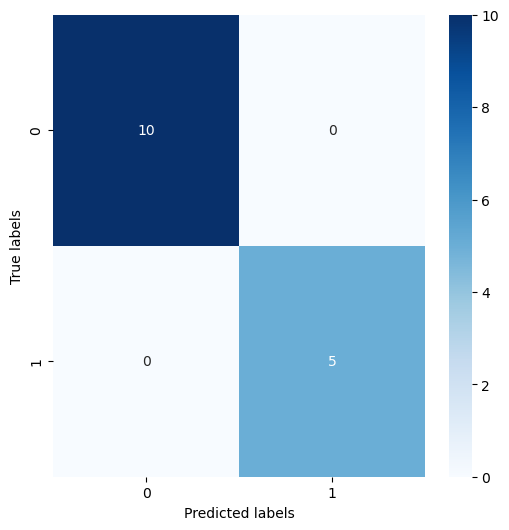

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 結果の説明
真陰性：実際に陰性であるものを陰性と判定できたもの

真陽性：実際に陽性であるものを陽性と判定できたもの

偽陽性：実際に陰性であるものを陽性と判定したもの

偽陰性：実際に陽性であるものを陰性と判定したもの

In [79]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,367.114663,342.304909,343.614106,362.254685,369.087755,378.199271,370.387595,412.123993,371.405115,381.432091,...,323.159265,358.913435,402.623200,387.763244,329.435511,358.579988,354.814404,391.126056,379.363962,399.181835
random_noise_5,348.853107,402.794647,354.520564,382.366382,371.329523,379.144400,339.928859,403.899577,375.869671,351.890208,...,431.631985,366.974520,362.223188,357.529392,384.860340,366.075623,381.731473,383.207751,387.923564,381.089854
random_noise_6,365.261772,366.834225,374.841740,357.992118,369.051600,358.529805,358.260800,409.005189,359.642588,371.612657,...,358.957583,372.167956,359.778600,381.416436,378.635117,366.485363,386.168204,372.243559,360.547111,389.275756
random_noise_9,377.985991,358.836585,343.112567,364.305495,366.473057,348.516175,378.864373,392.209487,382.508669,381.984970,...,351.482145,328.167846,364.917448,378.616201,391.274253,385.268687,366.955406,355.508265,368.832432,411.712585
noisy_16,375.747028,343.710491,361.802032,374.625718,349.454997,361.262979,356.053952,382.884676,358.089048,375.570988,...,353.069014,368.558210,358.913681,373.807579,381.239507,385.457173,375.487691,353.931146,406.545670,409.221625
random_noise_4,365.209126,386.915787,410.292467,331.895601,387.167431,382.299012,388.088346,390.315727,388.900344,354.975483,...,376.810243,366.659257,375.064238,376.608267,359.294741,377.763391,356.715698,397.549852,361.653200,388.654433
noisy_0,407.357084,380.970502,392.197394,416.642868,409.411151,354.386761,391.582477,370.321793,371.298245,381.209735,...,385.141061,391.110265,380.518331,351.988190,379.029913,398.954804,359.923556,370.396503,364.832789,409.003396
noisy_17,378.612564,337.409375,385.341715,395.473910,393.367066,409.718042,371.069713,366.250307,376.165031,364.818685,...,398.654441,390.746416,332.711047,368.247659,393.044486,367.247048,394.074887,373.917434,422.026138,369.895825
random_noise_21,384.575009,397.062120,389.154398,357.833664,381.236020,369.871613,371.861310,362.346157,371.469238,389.838354,...,411.500011,376.929409,389.321748,398.068461,412.636032,335.523896,381.100213,381.938771,394.639557,364.615561
random_noise_10,336.764686,365.284281,358.475144,355.420588,345.809282,388.832825,395.471401,395.868755,357.779936,387.233521,...,396.944628,416.629658,373.983629,355.832642,403.480614,353.587272,360.827094,409.633549,355.007738,385.885810


In [80]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


テストデータがどのようなものか観察してみる．

上2つはランダムなデータの代表，下2つは元データにノイズを乗せたものの代表である．

人間の目でも識別可能なものをロジスティック回帰でも識別できていることが確認できた．

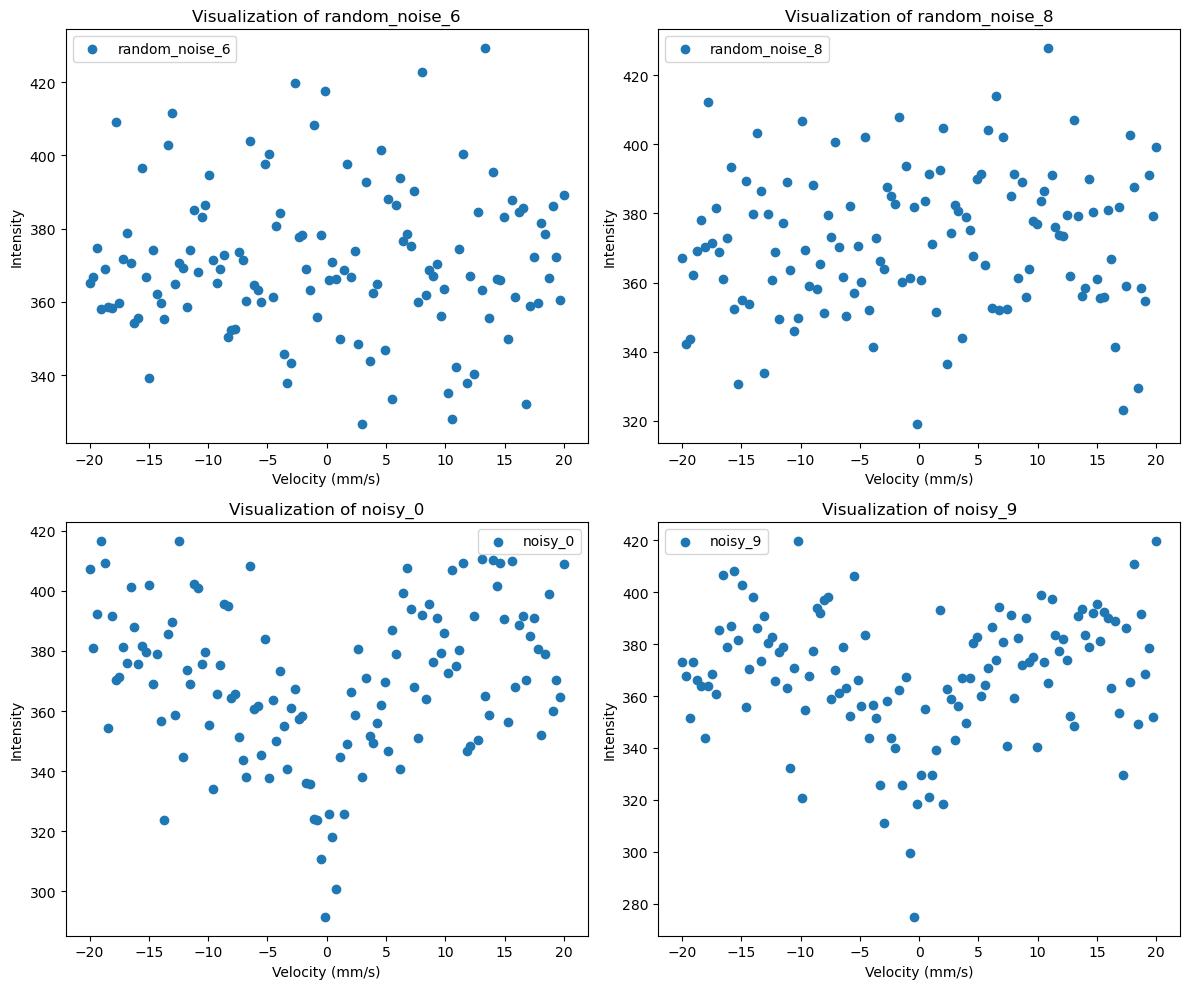

In [81]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6','random_noise_8','noisy_0', 'noisy_9']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset['Velocity (mm/s)'], dataset[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

# その他のデータで同じことをする

## EuF3_w1T7_8S5_85

### データセットの作成

In [82]:
# 空のデータフレームを作成
dataset_w1 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w1[column_name] = data['EuF3_w1T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 10)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w1T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w1T7_8S5_85']), size=data['EuF3_w1T7_8S5_85'].shape)
    dataset_w1[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w1.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [83]:
# 確認
dataset_w1.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,102.294038,106.251312,94.162962,82.937270,104.375127,86.725918,90.895409,92.299995,90.435915,...,74.906949,86.932607,94.603229,91.633286,72.143004,74.306740,79.857080,88.442632,82.484640,73.875352
1,-19.685039,97.115707,87.599281,83.842014,97.481475,91.070548,93.542416,75.792031,72.692395,111.132757,...,89.390353,90.745585,77.668461,100.733122,79.446494,88.719807,95.305746,87.783567,69.781403,95.017469
2,-19.370079,76.232460,86.350648,93.284778,90.547936,92.631782,89.485357,85.302401,96.923139,89.685810,...,83.803431,101.528931,91.960529,70.055509,90.427727,72.544725,100.126265,73.678000,82.015199,93.664809
3,-19.055118,91.537466,66.220907,75.338758,95.942333,90.925329,86.814727,92.252609,102.580306,93.154146,...,75.813921,76.795885,82.070119,83.692074,76.859850,92.171086,84.833316,82.160454,89.612526,74.518607
4,-18.740157,98.179496,92.133402,99.445205,105.129643,72.965867,94.475068,80.348799,102.172846,96.464077,...,103.055055,90.630095,89.847967,99.126651,95.613434,92.145506,87.170150,104.154118,73.543166,95.672038


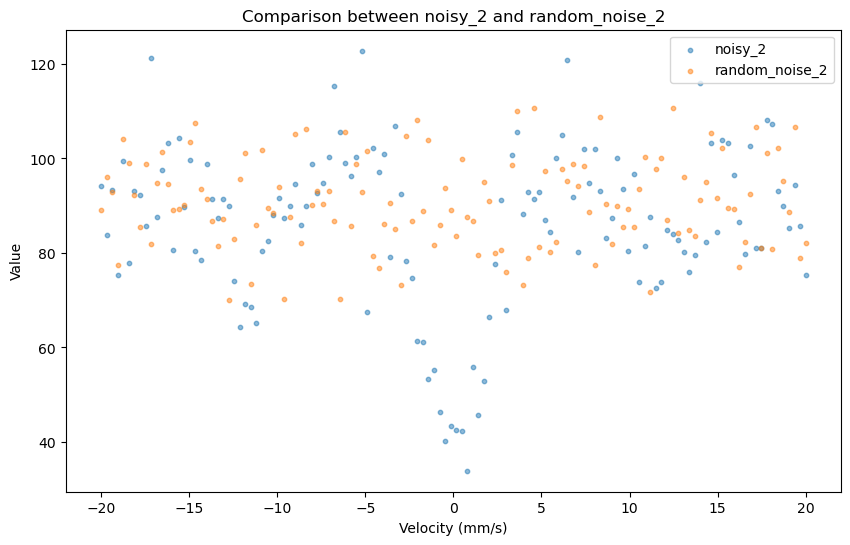

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

### ロジスティック回帰

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



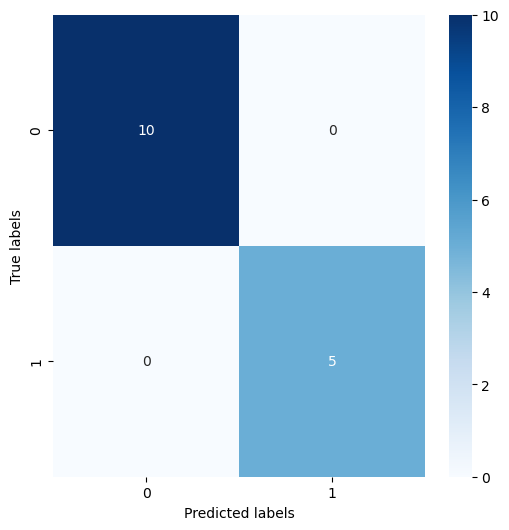

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w1.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [86]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,92.121331,81.080261,86.099235,84.617985,97.809798,85.772450,94.401635,108.720601,101.643202,85.524286,...,88.823873,81.870089,86.511505,96.486604,70.559108,88.187157,84.151111,89.017903,106.476005,85.454070
random_noise_5,83.930148,88.489185,83.200392,98.478782,72.216964,85.261133,111.393940,94.312819,96.410049,99.679784,...,74.644262,80.895318,84.445146,87.670828,82.737458,93.194574,99.446516,92.562578,95.111028,78.143508
random_noise_6,87.120030,90.676642,92.056251,80.921934,95.054650,79.833054,88.228381,97.163730,78.071269,80.705948,...,80.041007,71.520266,86.057169,105.180246,75.444644,89.575669,96.883095,94.367822,90.532101,86.514772
random_noise_9,82.575283,102.149815,101.484847,74.484925,75.780177,73.441743,107.286673,90.513187,89.188217,94.944114,...,88.938228,103.672954,100.367265,79.411357,72.153269,102.308733,110.905502,82.267941,91.990111,80.118365
noisy_16,91.539800,71.869306,97.780451,97.955607,90.015249,95.332754,92.815897,76.341791,85.778394,99.472827,...,95.025163,93.454980,73.220158,89.299203,79.841785,110.595337,93.890695,91.803306,74.775641,74.391681
random_noise_4,102.987755,91.777765,88.307444,90.850430,95.422881,112.627708,71.533148,66.742024,95.804218,91.591956,...,93.106479,93.577780,99.922278,81.738511,83.555910,82.448555,84.846757,105.598575,84.669213,82.438661
noisy_0,102.294038,97.115707,76.232460,91.537466,98.179496,85.782442,95.658200,94.390460,93.498440,91.765953,...,96.093450,77.809722,87.804684,80.355842,104.619409,115.886876,104.857618,94.274756,100.035559,91.263434
noisy_17,101.858590,87.433154,96.877114,95.408099,94.358267,92.192857,91.366599,95.687820,101.394364,105.219284,...,87.729393,101.188287,103.586397,101.074352,75.061861,106.627648,93.492527,109.113064,90.681552,95.407048
random_noise_21,79.857080,95.305746,100.126265,84.833316,87.170150,74.370428,87.112433,98.638255,83.746001,87.165155,...,89.487958,89.477447,98.541132,84.185750,82.104830,87.224114,83.853380,76.779527,82.004342,79.409624
random_noise_10,89.933489,92.149001,85.941628,87.748956,77.641165,65.090889,92.427037,81.413391,93.415642,98.539304,...,80.611536,87.779547,92.561912,87.424449,94.983955,76.625563,102.656031,72.519620,90.930718,106.353116


In [87]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


### テストデータの可視化

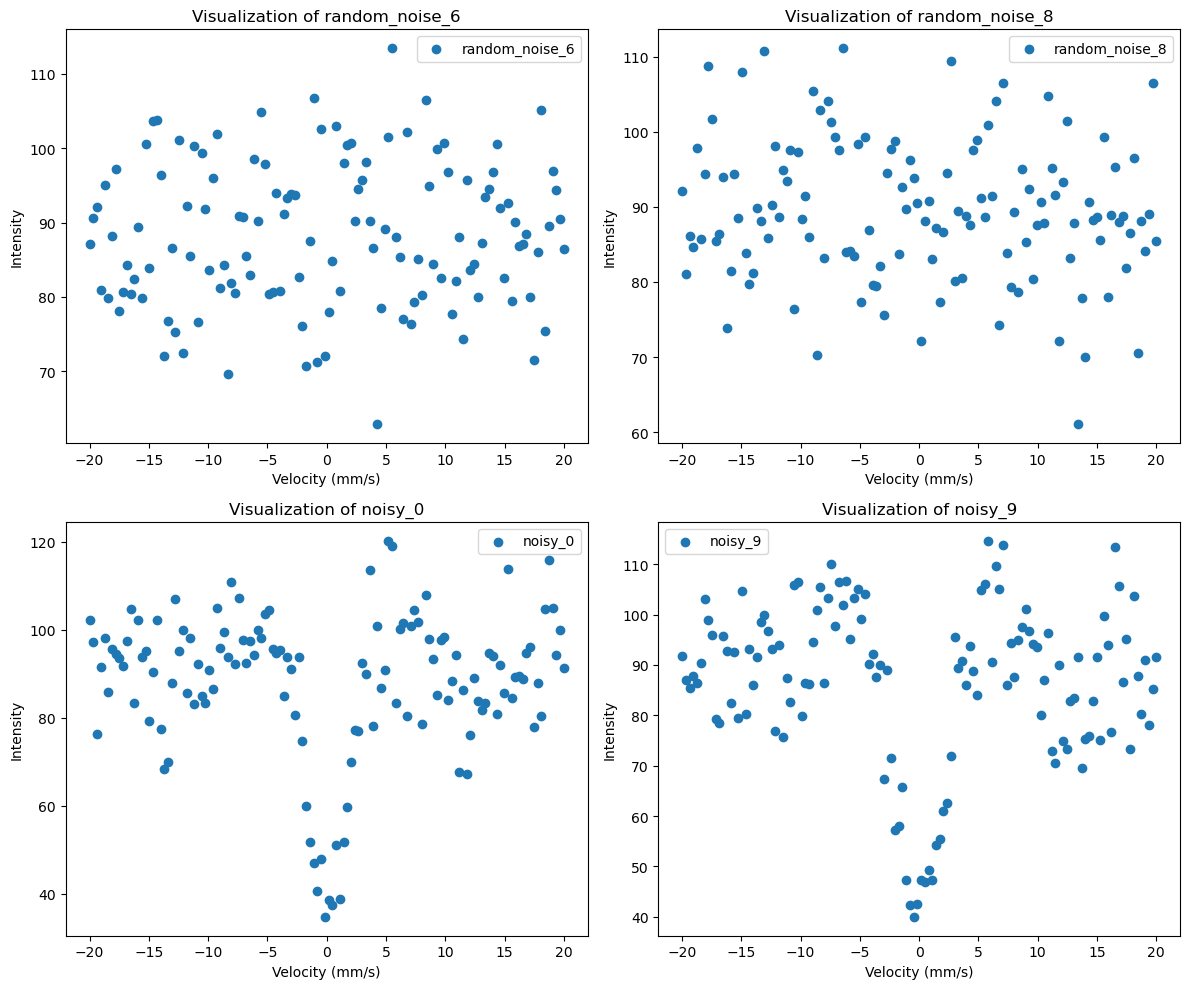

In [88]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6','random_noise_8','noisy_0', 'noisy_9']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w1['Velocity (mm/s)'], dataset_w1[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w2T7_8S5_85

In [89]:
# 空のデータフレームを作成
dataset_w2 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 20)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w2T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w2[column_name] = data['EuF3_w2T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 20)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w2T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w2T7_8S5_85']), size=data['EuF3_w2T7_8S5_85'].shape)
    dataset_w2[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w2.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

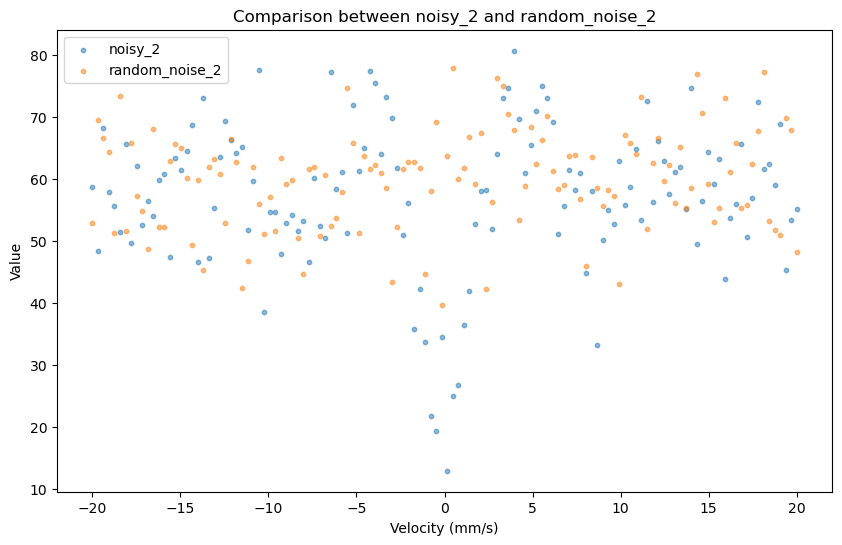

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



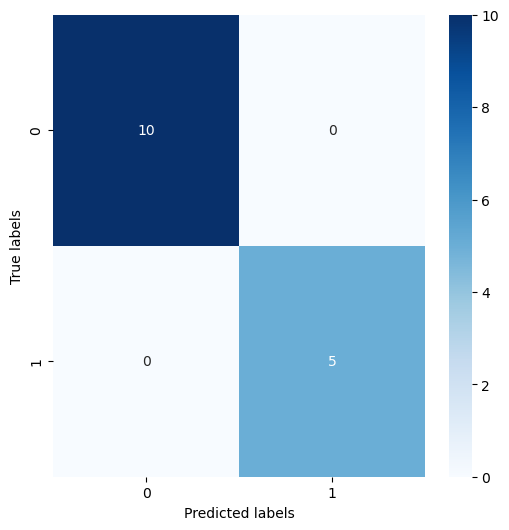

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w2.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [92]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,61.033535,68.442185,43.465941,54.568179,67.134274,77.908637,55.273299,65.249753,42.866770,57.091297,...,62.921148,70.646266,71.310833,67.367147,76.568932,61.458935,64.736487,62.787014,46.159285,74.478535
random_noise_5,47.415751,59.207445,54.658841,48.154164,70.332592,55.770615,53.428759,67.698203,49.559629,49.211237,...,50.961355,50.523667,73.386570,50.878942,66.157313,65.220974,64.916884,61.883844,53.446145,55.313947
random_noise_6,57.206467,60.310810,69.090095,48.953632,60.216784,59.076269,56.699706,51.053342,56.739891,79.403218,...,64.579633,39.390755,42.574435,62.269947,68.203678,68.677365,66.590212,47.761835,58.638688,57.761645
random_noise_9,45.165480,51.111632,60.052025,49.005710,64.273981,65.100809,48.104834,46.528565,63.941512,54.222966,...,52.160018,50.638863,61.087859,59.200399,44.519457,56.337373,55.551439,63.050627,70.394710,64.352063
noisy_16,64.661529,71.430255,55.812777,68.589185,54.915030,53.178242,56.017844,58.702348,46.935936,58.471591,...,65.274582,67.875192,56.322747,46.986944,55.961341,55.375955,58.739749,45.545372,72.877759,72.493765
random_noise_4,51.403383,53.117373,64.574656,73.498999,48.331475,61.248980,62.064800,61.228978,59.369758,73.354209,...,43.958073,53.642119,60.727747,54.239396,58.167164,61.808280,47.805340,53.964047,56.384004,57.499528
noisy_0,66.261228,61.192498,62.534308,41.596277,51.104553,63.389924,65.772556,50.542610,61.180531,59.816313,...,54.004381,61.132611,60.199227,54.983037,71.432644,58.285471,45.900772,58.906916,71.558068,51.492254
noisy_17,59.026365,64.888587,62.450120,49.654579,71.180789,66.696247,60.707303,54.577940,64.656143,50.519949,...,70.300239,50.520294,67.158724,51.486437,69.239719,63.974268,58.949957,73.558528,50.856258,53.272638
random_noise_21,70.360875,51.078575,54.694465,53.610356,62.122074,71.447054,36.652420,69.924992,64.445133,61.651609,...,58.589407,54.898107,65.722175,61.440989,73.224674,64.072560,61.001691,65.143724,55.786297,59.139970
random_noise_10,46.927090,58.661519,45.492541,61.471386,61.450559,56.508057,59.428632,62.080189,66.366697,56.662154,...,66.413238,45.409454,74.024599,56.660023,96.357552,73.361660,53.611748,58.011182,62.842773,76.362533


In [93]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


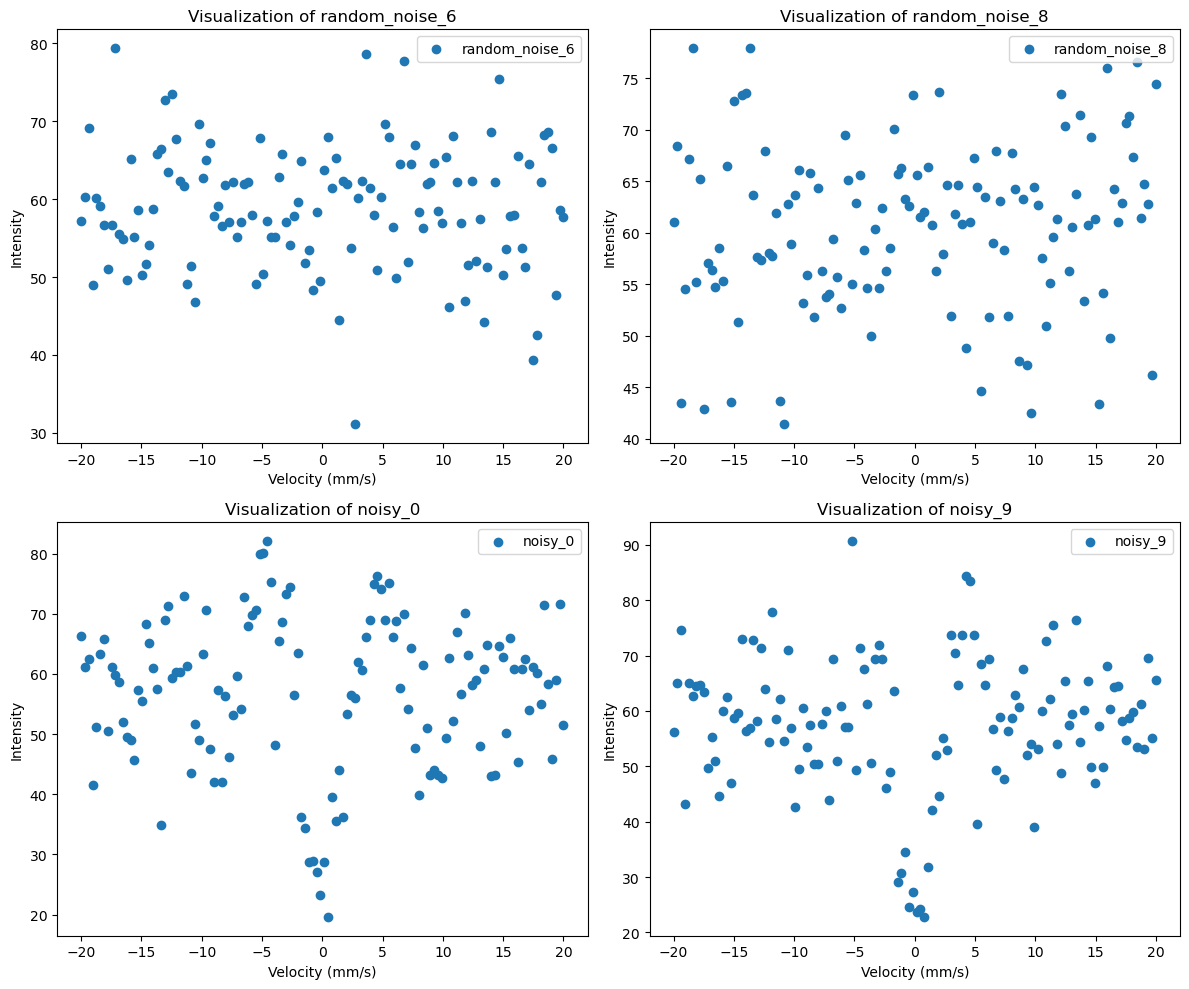

In [94]:

import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6','random_noise_8','noisy_0', 'noisy_9']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w2['Velocity (mm/s)'], dataset_w2[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w3T7_8S5_85

In [95]:
# 空のデータフレームを作成
dataset_w3 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 30)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w3T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w3[column_name] = data['EuF3_w3T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 30)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w3T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w3T7_8S5_85']), size=data['EuF3_w3T7_8S5_85'].shape)
    dataset_w3[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w3.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

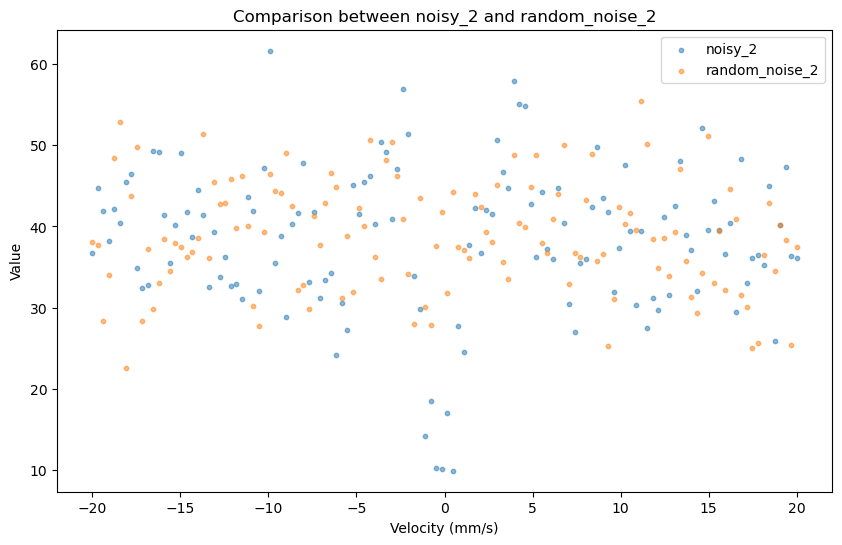

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



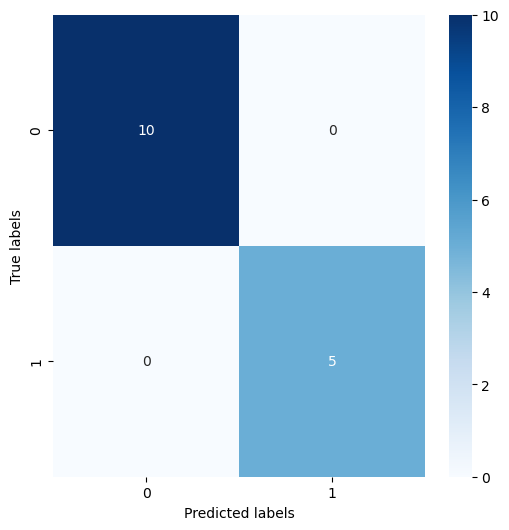

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w3.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [98]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,25.579539,45.862622,39.147889,34.993001,38.924746,31.381897,40.743979,28.626166,29.521618,40.579606,...,36.169635,43.597179,42.648968,47.479001,44.847334,41.400520,35.763506,33.490564,38.693132,33.873973
random_noise_5,33.173640,35.266517,46.186660,31.177468,26.538768,47.077019,43.527668,41.289782,38.930696,32.030265,...,42.907682,32.573718,31.403281,42.451789,41.738764,50.200919,31.918222,35.618521,55.365991,33.394573
random_noise_6,36.232445,41.665768,38.916652,45.544820,40.193308,43.077001,32.413459,30.914265,38.665397,31.762349,...,36.048431,48.469411,38.163218,38.224052,43.752140,43.407632,32.321046,34.859921,33.421842,40.255059
random_noise_9,45.789387,26.555007,31.748173,52.606025,27.061563,36.217464,31.839684,32.477846,24.125988,43.312618,...,36.878980,33.321894,33.117405,46.337796,27.781336,39.667763,44.192701,33.037458,34.535753,30.388690
noisy_16,42.573537,46.306853,43.345968,32.892737,39.864750,35.865971,36.182249,33.037185,35.884965,41.818753,...,48.604481,37.591189,41.467034,44.391331,49.318267,25.405607,40.297370,41.035801,45.527294,36.128199
random_noise_4,28.509945,42.438412,41.547277,28.933722,42.869643,31.487275,31.219113,49.981836,31.922413,25.232095,...,44.328808,27.083466,38.362691,39.825883,45.782416,47.653067,38.738829,45.144068,33.560177,23.175590
noisy_0,31.038161,48.151528,32.257542,40.700331,36.731239,38.782889,26.179783,46.022593,37.260037,29.931123,...,54.911020,34.480431,32.998757,31.692943,40.580937,35.069384,40.498270,41.442080,43.366150,41.448105
noisy_17,33.633834,46.771337,43.978806,41.744708,30.900919,47.862546,30.495826,41.425141,34.670346,33.044326,...,33.773217,38.705110,42.982013,50.626170,32.029306,31.201070,30.957369,46.605967,45.479190,29.857175
random_noise_21,44.791020,35.445495,32.314128,35.358090,39.598929,37.836926,37.822977,40.110156,31.343938,48.001063,...,49.811301,31.429838,41.131322,43.412813,35.875083,38.734216,33.701753,39.527999,28.204391,42.826337
random_noise_10,33.723330,35.542259,33.557944,35.793840,45.246864,43.565700,28.985281,39.472004,39.131826,29.132487,...,35.919931,42.124431,37.192077,36.479801,38.078134,39.650404,42.338545,32.098992,42.549203,44.847487


In [99]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


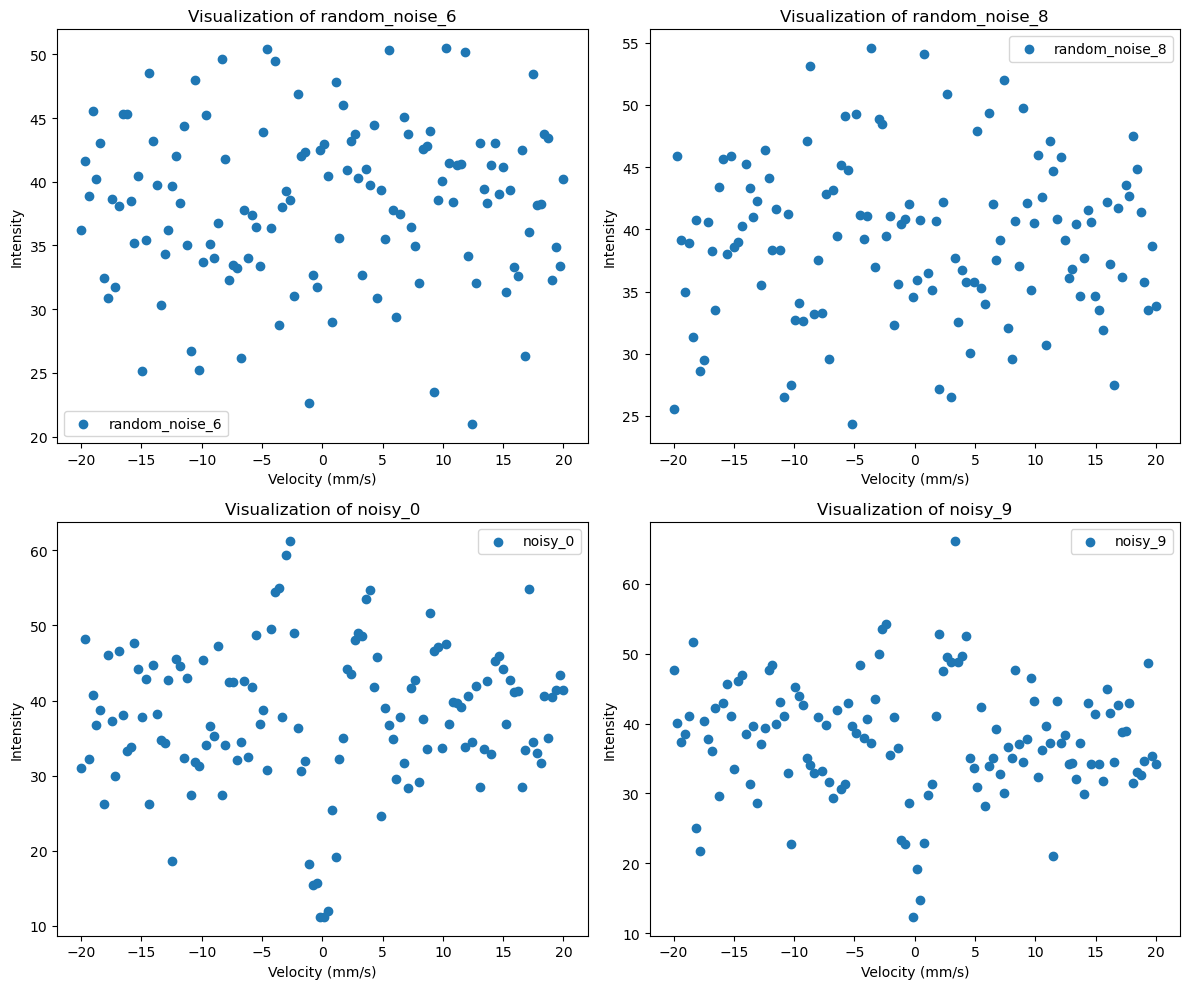

In [100]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6','random_noise_8','noisy_0', 'noisy_9']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w3['Velocity (mm/s)'], dataset_w3[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()